In [1]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.4.1


In [3]:

############Adjustments##############

#options
PATH_DI06C001 = '/media/sf_SF/Stage2021/targetedQE/' 

## Adjustments
path = PATH_DI06C001

filename_Y_labels = 'total_y_matrix_with_binary_label.txt'

########################



# load libraries
import pandas as pd
import os
import random
from PIL import Image
import numpy as np


#set paths
path_data_in = path + 'data/input/' + 'MachineLearning/'
path_data_out = path + 'data/output/' + 'MachineLearning/'
path_data_X = path_data_in + 'Xarrays/' #png's
path_data_y = path_data_in + 'Yarrays/' #labels



## Y
#load all Y labels together
filename = path_data_y + filename_Y_labels
# print(filename)

y = pd.read_csv(filename, sep='\t')



## X
#list all X files and devide in train OR test folder
filenames_X_train = []
filenames_X_test = []
directory_list = os.listdir(path_data_X)
# print(directory_list)

#random order list with filenames
random.shuffle(directory_list)

i = 0
for filename in directory_list:
    #print (filename) #all files, folders
    #print (i)
    if ".png" in filename:
        #print (filename)
        if i % 3 == 0: 
            #1/3th of data is test set, rest in train
            #print(i)
            filenames_X_test.append(path_data_X + filename)
        else:
            filenames_X_train.append(path_data_X + filename)
        i = i + 1
        
 #check ok? 70-30 devide train - test? ok     
print(len(filenames_X_train))
print(len(filenames_X_test))


## load X data + Merge per train/test X's with Y to S1
#keep only non unique values


def load_X_if_matched_in_y(filenames_list, y):
    all_images_as_array=[]
    label=[]    
    # match = 0
    # no_match = 0
    for filename in filenames_list:
        #print(filename)
        #filename = filenames_X_train[3]
        filename_wopath = filename.split('Xarrays/')[1]
        #filename_wopath = filename_wopath[:-4] #wo .png todo, see same x/y !!!
        # print(filename_wopath)
    
        matching_y = y[y.png==filename_wopath]
        if len(matching_y) == 1:
            label.append(matching_y.iloc[0,2]) #1st elem contains string NF/FOUND
            
            #load figure correctly as array [[], [], []]]
            img=Image.open(filename)
            np_array = np.asarray(img)
            l,b,c = np_array.shape    
            np_array = np_array.reshape(l*b*c,)   
            all_images_as_array.append(np_array)
            # match = match + 1
            
        if len(matching_y) != 1:
            # print("no or multiple match(es) in y found for: " + filename)
            # no_match = no_match + 1
            continue

    return np.array(all_images_as_array), np.array(label)
    

#if re.match(filename_wopath, y.Name[0]): #todo search in volled colom, ev niet via regress want wo .png moet volled zelfde
        


X_train,y_train = load_X_if_matched_in_y(filenames_X_train, y)
X_test, y_test = load_X_if_matched_in_y(filenames_X_test, y)


# print(X_train)
# print(len(y_train))
# print(X_test)
# print(len(y_test))



3406
1704


In [4]:
import matplotlib.pyplot as plt

In [5]:
print(X_test[1])

[255 255 255 ... 255 255 255]


TypeError: Invalid shape (16384,) for image data

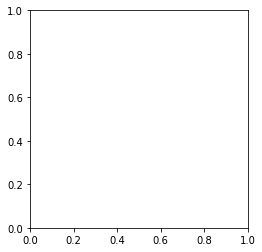

In [6]:
image = X_train[1]
plt.imshow(image)
plt.show()

In [8]:
# Reshape
X_train = X_train.reshape((len(X_train),64, 64,4))
X_test = X_test.reshape((len(X_test),64, 64,4)) 

In [9]:
print(X_test[1])

[[[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 ...

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ...
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]]


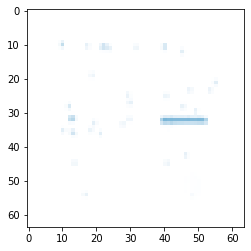

In [10]:
image = X_train[1]
plt.imshow(image)
plt.show()

In [11]:
X_train = X_train / 255
X_test = X_test / 255

In [12]:
print(X_test[1])

[[[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 ...

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]

 [[1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  ...
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]
  [1. 1. 1. 1.]]]


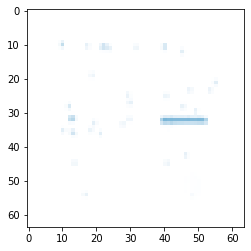

In [13]:
image = X_train[1]
plt.imshow(image)
plt.show()

In [ ]:
y_train_1[1]

In [24]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(64, 64, 4)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
     
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
     
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dropout(0.2), 
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [25]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 64, 64, 32)        1184      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1638500   
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)              

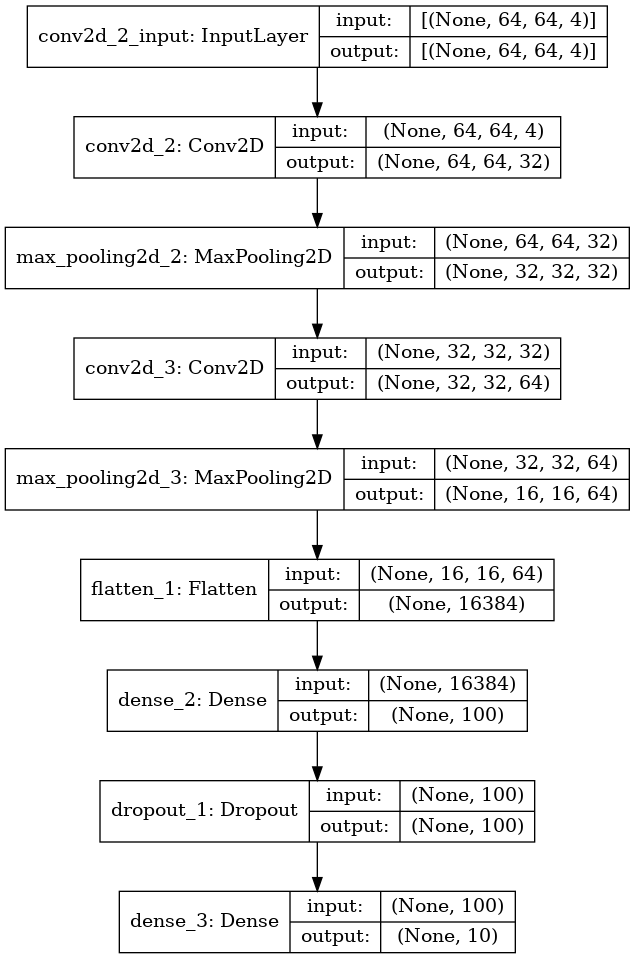

In [27]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=True,
    dpi=96,
)

In [28]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='min',
    save_best_only=True)

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
callbacks = [
             EarlyStopping(patience=10),
             model_checkpoint_callback,

]

In [32]:
history = model.fit(X_train,y_train, epochs=35,validation_data=(X_test,y_test),callbacks=callbacks)

Epoch 1/35
73/73 [==============================] - 34s 465ms/step - loss: 0.6621 - accuracy: 0.6391 - val_loss: 0.6483 - val_accuracy: 0.6565
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 2/35
73/73 [==============================] - 28s 382ms/step - loss: 0.6595 - accuracy: 0.6519 - val_loss: 0.6526 - val_accuracy: 0.6565
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 3/35
73/73 [==============================] - 35s 475ms/step - loss: 0.6572 - accuracy: 0.6528 - val_loss: 0.6459 - val_accuracy: 0.6565
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 4/35
73/73 [==============================] - 32s 439ms/step - loss: 0.6557 - accuracy: 0.6536 - val_loss: 0.6660 - val_accuracy: 0.6565
INFO:tensorflow:Assets written to: /tmp/checkpoint/assets
Epoch 5/35
73/73 [==============================] - 37s 505ms/step - loss: 0.6494 - accuracy: 0.6541 - val_loss: 0.6459 - val_accuracy: 0.6565
INFO:tensorflow:Assets written to: /tmp/checkpoint/as

KeyboardInterrupt: 

In [33]:
loss, accuracy = model.evaluate(X_test,y_test)
print('Accuracy on test dataset:', accuracy)

38/38 [==============================] - 5s 134ms/step - loss: 0.5571 - accuracy: 0.6827
Accuracy on test dataset: 0.6827003955841064


In [34]:
predictions = model.predict(X_test)

In [35]:
import numpy as np


In [38]:
np.argmax(model.predict(X_test[60].reshape(1,64,64,4)), axis=-1)

array([1])

In [39]:
y_test[60]

1

In [40]:
import pandas as pd

metrics_df = pd.DataFrame(history.history)

In [41]:
metrics_df

,loss,accuracy,val_loss,val_accuracy
0,0.782132,0.620601,0.64824,0.65654


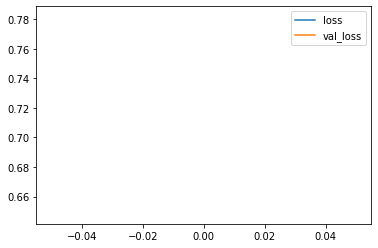

In [42]:
metrics_df[["loss","val_loss"]].plot();

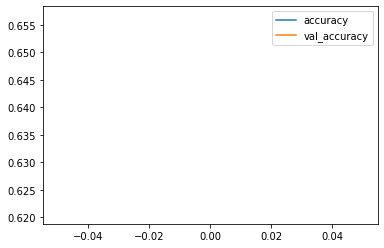

In [43]:
metrics_df[["accuracy","val_accuracy"]].plot();

In [44]:
model.save("model.h5")

In [45]:
load_saved_model = tf.keras.models.load_model("model.h5")

In [ ]:
load_saved_model.summary()

In [ ]:
another_saved_model = tf.keras.models.load_model(checkpoint_filepath)

In [ ]:
another_saved_model.summary()

# Model with Batch Normalization

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [64]:
model = tf.keras.Sequential(
    [
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation="relu",input_shape=(64, 64, 4)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
     
    tf.keras.layers.Conv2D(64, (3,3), padding='same', activation="relu"),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
     
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="softmax")
]
)

In [65]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [66]:
history = model.fit(X_train,y_train, epochs=50,validation_data=(X_test,y_test),
                    callbacks=callbacks
                    )

Epoch 1/50
73/73 [==============================] - 43s 560ms/step - loss: 1.7708 - accuracy: 0.6177 - val_loss: 10.6891 - val_accuracy: 0.0000e+00
Epoch 2/50
73/73 [==============================] - 31s 424ms/step - loss: 0.6656 - accuracy: 0.8239 - val_loss: 16.8499 - val_accuracy: 0.6565
Epoch 3/50
73/73 [==============================] - 36s 491ms/step - loss: 0.4113 - accuracy: 0.8386 - val_loss: 28.8251 - val_accuracy: 0.0000e+00
Epoch 4/50
73/73 [==============================] - 34s 461ms/step - loss: 0.3616 - accuracy: 0.8608 - val_loss: 15.9511 - val_accuracy: 0.0000e+00
Epoch 5/50
73/73 [==============================] - 33s 448ms/step - loss: 0.3193 - accuracy: 0.8720 - val_loss: 25.0254 - val_accuracy: 0.3435
Epoch 6/50
73/73 [==============================] - 37s 507ms/step - loss: 0.3095 - accuracy: 0.8750 - val_loss: 20.3030 - val_accuracy: 0.3435
Epoch 7/50
73/73 [==============================] - 32s 435ms/step - loss: 0.2708 - accuracy: 0.8902 - val_loss: 43.7132 - v

In [67]:
loss, accuracy = model.evaluate(X_test,y_test)
print('Accuracy on test dataset:', accuracy)

38/38 [==============================] - 2s 42ms/step - loss: 93.0595 - accuracy: 0.0000e+00
Accuracy on test dataset: 0.0


In [70]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

y_pred = model.predict_classes(X_test)
print('\n')
print('accuracy score:', accuracy_score(y_test, y_pred) * 100) 
print('\n')
print(classification_report(y_test, y_pred))
cf = confusion_matrix(y_test, y_pred)
print(cf)

/home/bit/.local/lib/python3.6/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '




accuracy score: 0.0


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     407.0
           1       0.00      0.00      0.00     778.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       0.0

    accuracy                           0.00    1185.0
   macro avg       0.00      0.00      0.00    1185.0
weighted avg       0.00      0.00      0.00    1185.0

[[  0   0   0 407]
 [  0   0   2 776]
 [  0   0   0   0]
 [  0   0   0   0]]


/usr/local/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib64/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib64/python3.6/site-packages/sklearn/metrics/_classificat

In [ ]:
import pandas as pd

metrics_df = pd.DataFrame(history.history)

In [ ]:
metrics_df

In [ ]:
metrics_df[["accuracy","val_accuracy"]].plot();

# Running CNN on TensorFlow in the real world

In [ ]:
 !wget --no-check-certificate \
    https://namespace.co.ke/ml/dataset.zip \
    -O /tmp/catsdogs.zip

In [ ]:
import os
import zipfile


In [ ]:
with zipfile.ZipFile('/tmp/catsdogs.zip', 'r') as zip_ref:
    zip_ref.extractall('/tmp/cats_dogs')

In [ ]:
base_dir = '/tmp/cats_dogs/dataset'
train_dir = os.path.join(base_dir, 'training_set')
test_dir = os.path.join(base_dir, 'test_set')


In [ ]:
import os
os.listdir(base_dir)

In [ ]:
training_set = tf.keras.preprocessing.image_dataset_from_directory(
  train_dir,
  seed=101,
  label_mode="binary",
  image_size=(200, 200),
  batch_size=32)

In [ ]:
class_names = training_set.class_names


In [ ]:
class_names

In [ ]:
validation_set = tf.keras.preprocessing.image_dataset_from_directory(
  test_dir,
  seed=101,
  image_size=(200, 200),
  batch_size=32)

In [57]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [58]:
data_augmentation = keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(200, 
                                                              200,
                                                              3)),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
  ]
)

In [59]:
model = Sequential([
    data_augmentation,
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255),             
    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(filters=32,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=64,kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(1, activation='sigmoid')
])

In [60]:
model.compile(optimizer='adam',
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [62]:
history = model.fit(X_train,validation_data=X_test, epochs=10,callbacks=callbacks)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
import pandas as pd

metrics_df = pd.DataFrame(history.history)

In [ ]:
loss, accuracy = model.evaluate(validation_set)
print('Accuracy on test dataset:', accuracy)

In [ ]:
metrics_df[["loss","val_loss"]].plot();

In [ ]:
metrics_df[["binary_accuracy","val_binary_accuracy"]].plot();

In [ ]:
loss, accuracy = model.evaluate(validation_set)
print('Accuracy on test dataset:', accuracy)

In [ ]:
import numpy as np
from keras.preprocessing import image

In [ ]:
!wget --no-check-certificate \
    https://upload.wikimedia.org/wikipedia/commons/c/c7/Tabby_cat_with_blue_eyes-3336579.jpg \
    -O /tmp/cat.jpg

In [ ]:
test_image = image.load_img('/tmp/cat.jpg', target_size=(200, 200))


In [ ]:
test_image = image.img_to_array(test_image)


In [ ]:
test_image.shape

In [ ]:
test_image = np.expand_dims(test_image, axis=0)


In [ ]:
prediction = model.predict(test_image)


In [ ]:
prediction[0][0]

In [ ]:
if prediction[0][0]>0.5:
  print(" is a dog")
else:
   print(" is a cat")

In [ ]:
!wget --no-check-certificate \
    https://upload.wikimedia.org/wikipedia/commons/1/18/Dog_Breeds.jpg \
    -O /tmp/dog.jpg

In [ ]:
test_image2 = image.load_img('/tmp/dog.jpg', target_size=(200, 200))


In [ ]:
test_image2 = np.expand_dims(test_image2, axis=0)


In [ ]:
prediction = model.predict(test_image2)


In [ ]:
prediction[0][0]

In [ ]:
if prediction[0][0]>0.5:
  print(" is a dog")
else:
   print(" is a cat")

# Architectures

# Model without weights

In [ ]:
model = tf.keras.applications.Xception(
    include_top=True,
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [ ]:
model.summary()

# Model with Weights

In [ ]:
model = tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
!wget --no-check-certificate \
    https://upload.wikimedia.org/wikipedia/commons/b/b5/Lion_d%27Afrique.jpg \
    -O /tmp/lion.jpg
img_path = '/tmp/lion.jpg'
img = image.load_img(img_path, target_size=(299, 299))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = tf.keras.applications.xception.preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', tf.keras.applications.xception.decode_predictions(preds, top=3)[0])

In [ ]:
x.shape